In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
import zipfile
import os
import pandas as pd

# Path to the main ZIP file
zip_file_path = '/content/bank+marketing.zip'
extracted_folder = '/content/extracted_files'

# Extract the main ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as main_zip:
    main_zip.extractall(extracted_folder)

# List the extracted files
inner_files = os.listdir(extracted_folder)
print("Extracted files:", inner_files)

# Extract one of the inner ZIP files (e.g., 'bank.zip')
inner_zip_path = os.path.join(extracted_folder, 'bank.zip')
inner_extracted_folder = os.path.join(extracted_folder, 'bank')

with zipfile.ZipFile(inner_zip_path, 'r') as inner_zip:
    inner_zip.extractall(inner_extracted_folder)

# Load the CSV file
csv_file_path = os.path.join(inner_extracted_folder, 'bank-full.csv')
data = pd.read_csv(csv_file_path, sep=';')

# Display the first few rows of the dataset
print(data.head())

Extracted files: ['bank.zip', 'bank-additional.zip']
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [49]:
!unzip -l /content/bank+marketing.zip

Archive:  /content/bank+marketing.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   579043  2023-05-22 15:20   bank.zip
   444572  2023-05-22 15:20   bank-additional.zip
---------                     -------
  1023615                     2 files


In [ ]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



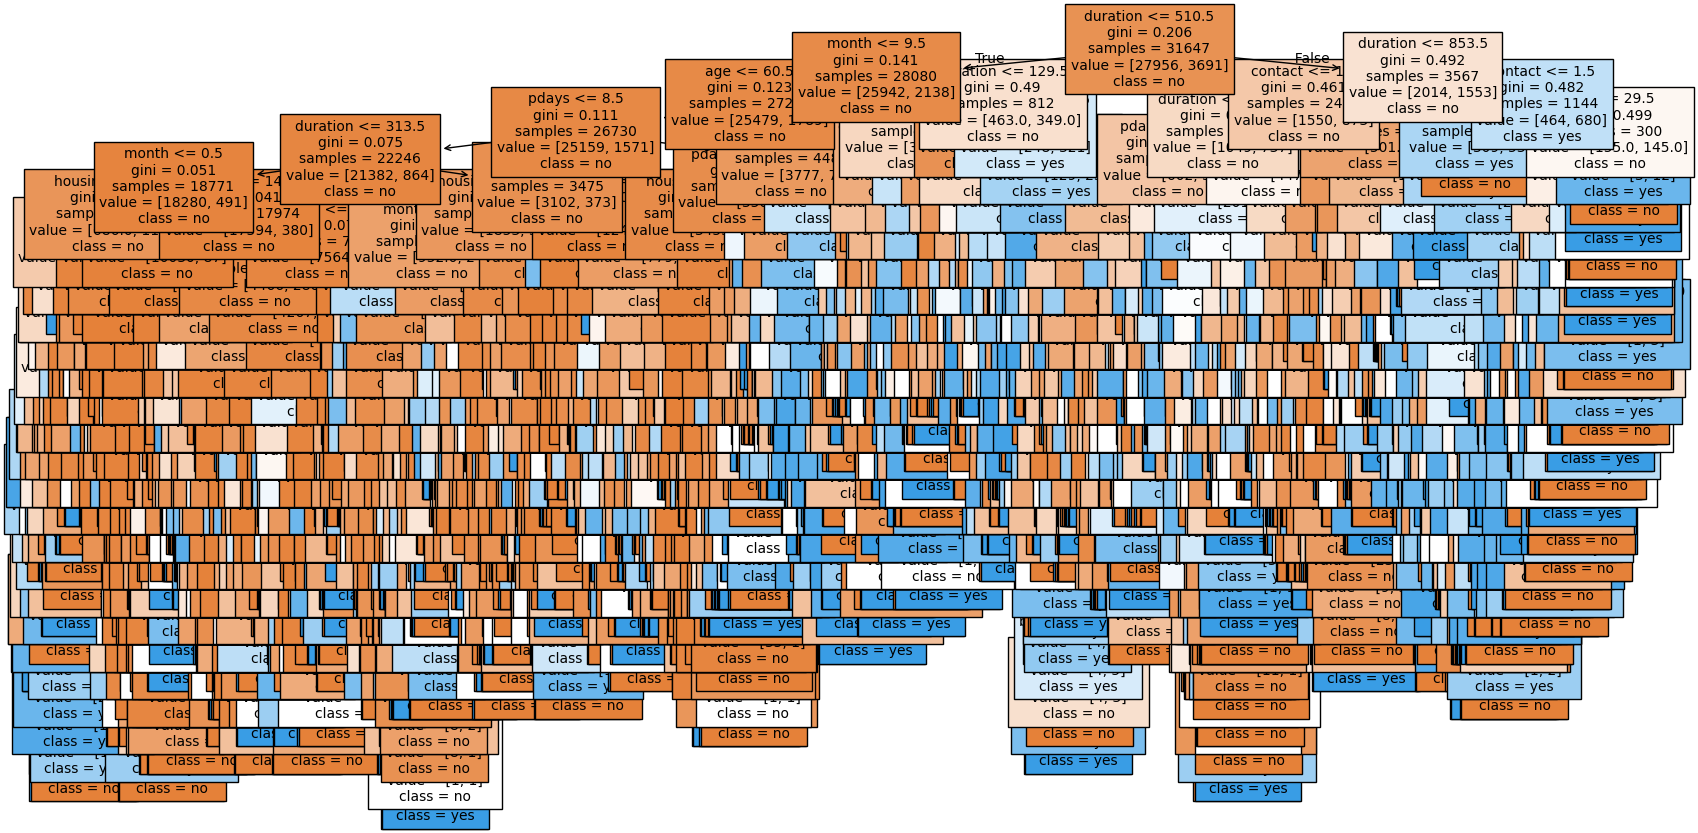

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True, fontsize=10)
plt.show()

In [ ]:
# 1. Prepare the data
# Select features and target variable
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'y'  # The target variable is 'y' (whether the client subscribed to a term deposit)

X = data[features]
y = data[target]

In [ ]:
# 2. Encode categorical features
# One-hot encoding for categorical features using pandas get_dummies
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])


In [ ]:
# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% for training, 20% for testing


In [ ]:
# 4. Create and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# 5. Make predictions on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8732721441999336


In [ ]:
!pip install graphviz
!pip install pydotplus

In [48]:
import zipfile
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
import pydotplus
from IPython.display import Image

In [ ]:
# 1. Create and train the Decision Tree Classifier (same as before)
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 2. Export the decision tree to a DOT file
dot_data = export_graphviz(classifier,
                           out_file=None,
                           feature_names=X_train.columns,
                           class_names=['no', 'yes'],  # Replace with your class names
                           filled=True,
                           rounded=True,
                           special_characters=True)

In [ ]:
# 3. Create the decision tree diagram from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

In [47]:
# 4. Display the diagram in the notebook
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.264152 to fit

